In [3]:
!pip3 install wget
!pip3 install opencv-python
!python -m pip install -U matplotlib


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Computer Vision Basics Notebook

This notebook contains exercises for the computer vision basics material.

### Exercise 1 - Dealing with digital images:

In this exercise we will familiarize ourselves with how to load, display and operate on images.

1. Load the image ```lemur_img.png``` using opencv via the ```imread()``` function.
2. Display the image using matplotlibs ```plt.imshow()``` function (you have to add ``` import matplotlib.pyplot as plt```). Does it look weird?
3. Convert the image from BGR to RGB using opencv's ```cvtColor()``` function.
4. Determine the image's width, height and number of color channels.
5. Resize your image (using opencv) to a width of 512 pixels and a height of 340 pixels.
6. Compute and print the mean pixel values in each color channel.
7. Convert the image to grayscale using opencv.

In [28]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/lemur_img.png -o lemur_img.png


Saved under lemur_img.png


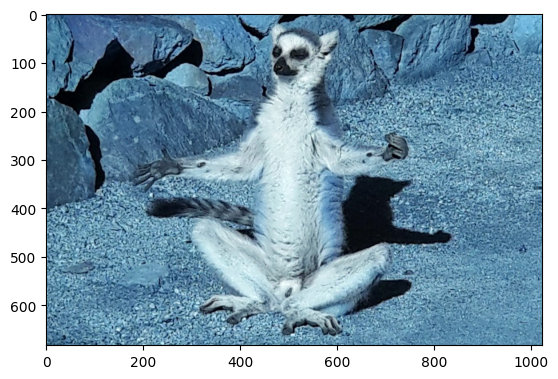

In [31]:
image = cv2.imread("lemur_img.png")

plt.imshow(image)

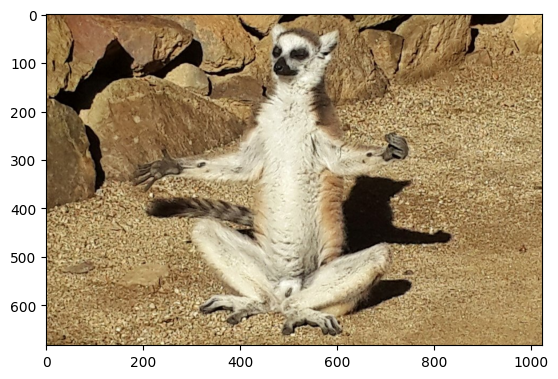

In [32]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

height: 683

width: 1024

channels: 3

Channel 1 = 157.1555522510981
Channel 2 = 133.5780821056003
Channel 3 = 95.84116775713763


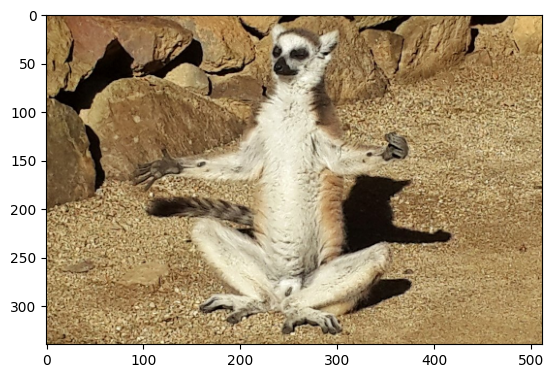

In [33]:
print(f"height: {image.shape[0]}\n")
print(f"width: {image.shape[1]}\n")
print(f"channels: {image.shape[2]}\n")

resized = cv2.resize(image, (512, 340))

for i in range(image.shape[2]):
  print(f"Channel {i + 1} = {np.mean(image[:,:,i])}")

plt.imshow(resized)

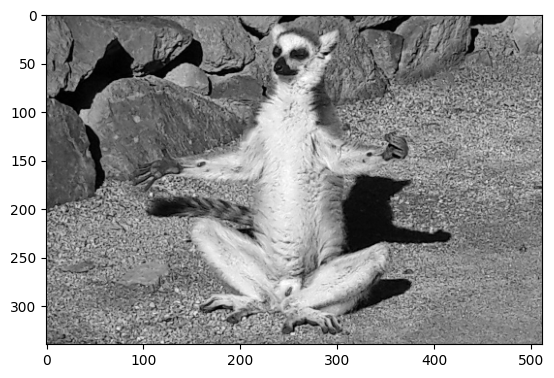

In [34]:
greyscaled = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.imshow(greyscaled, cmap="gray")

### Exercise 2 - Convolution in 2d:

Implement the 2d-convolution operation:
1. Assume your inputs are grayscale images i.e. numpy arrays of shape WidthxHeightx1
2. Assume your kernels have an odd number of entries in each dimension
3. Use zero padding

When you are done test your implementation against the test-data (conv2d_test_data) which comes as a dictionary with inputs, kernels
and expected results.




In [3]:
# Test data for your implementation.
#
# !python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/conv2d_test_data.pickle -o conv2d_test_data.pickle
import pickle
with open('conv2d_test_data.pickle', 'rb') as fd:
    ref = pickle.load(fd)

In [1]:
def conv2d(img, kernel):
  img_height, img_width = img.shape

  kernel = np.flipud(np.fliplr(kernel))
  k_height, k_width = kernel.shape

  pad_height = k_height // 2
  pad_width = k_width // 2

  padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

  result_img = np.zeros_like(img)

  for y in range(img_height):
    for x in range(img_width):
      for ker_y in range(k_height):
        for ker_x in range(k_width):
          padded_img_value = padded_img[y + ker_y, x + ker_x]
          kernel_value = kernel[ker_y, ker_x]

          result_img[y, x] += padded_img_value * kernel_value

  return result_img

for i in range(3):
  res = conv2d(ref[f"img{i + 1}"], ref[f"kernel{i + 1}"])
  if np.array_equal(res, ref[f"result{i + 1}"]):
    print(f"Test {i + 1} passed")

NameError: name 'ref' is not defined

### Exercise 3 - Image Filters:

Use your implementation of conv2d (or if you aren't done yet the implementation in opencv ```cv2.filterd2D()```) to filter an image with
1. Identity filter
2. Horizontal Sobel filter
3. Vertical Sobel filter
4. Sharpen filter
5. Box-Blur filter
6. Gaussian-Blur filter


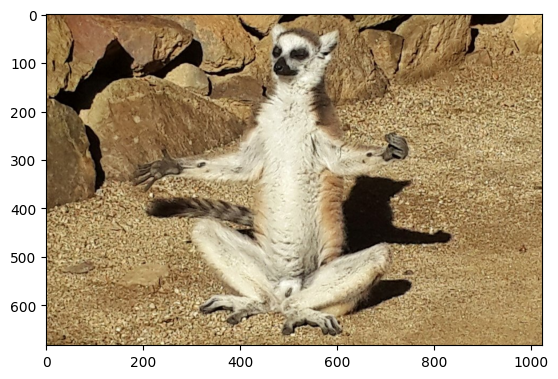

In [10]:
identity_filter = np.array(
    [[0,0,0],
     [0,1,0],
     [0,0,0]]
)
ver_sobel_filter = np.array(
    [[1,0,-1],
     [2,0,-2],
     [1,0,-1]]
)
hor_sobel_filter = np.array(
    [[1,2,1],
     [0,0,0],
     [-1,-2,-1]]
)
sharpen_filter = np.array(
    [[0,-1,0],
     [-1,5,-1],
     [0,-1,0]]
)
box_blur_filter = 1/9 * np.array(
    [[1,1,1],
     [1,1,1],
     [1,1,1]]
)
gaussian_blur_filter = 1/256 * np.array(
    [[1,4,6,4,1],
     [4,16,24,16,4],
     [6,24,36,24,6],
     [4,16,24,16,4],
     [1,4,6,4,1]]
)

image = cv2.imread("lemur_img.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

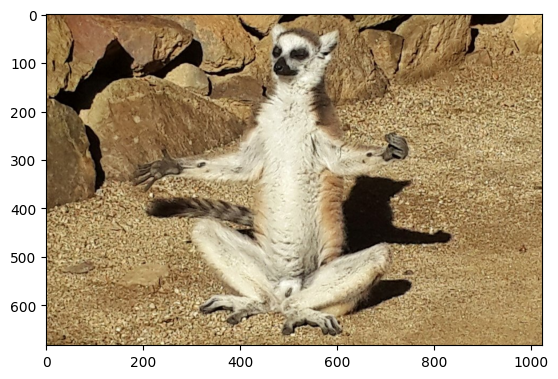

In [ ]:
identity_img = cv2.filter2D(image, ddepth=-1, kernel=identity_filter)

plt.imshow(identity_img)

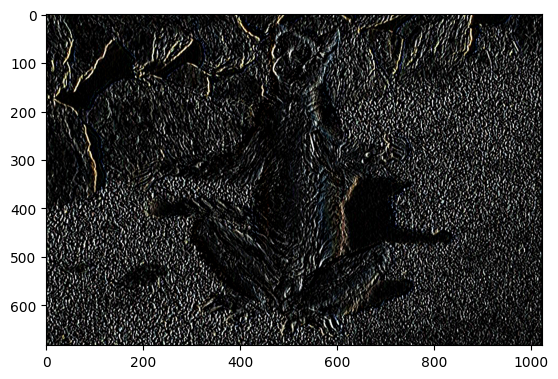

In [ ]:
ver_sobel_img = cv2.filter2D(image, ddepth=-1, kernel=ver_sobel_filter)

plt.imshow(ver_sobel_img)

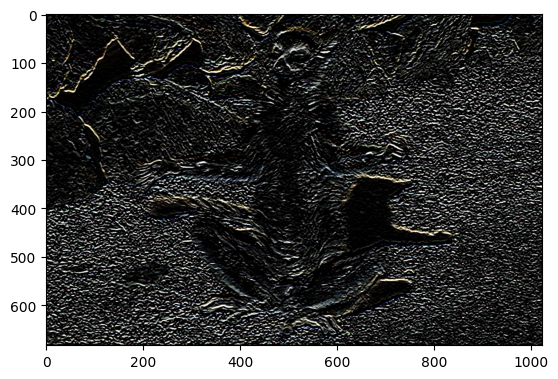

In [ ]:
hor_sobel_img = cv2.filter2D(image, ddepth=-1, kernel=hor_sobel_filter)

plt.imshow(hor_sobel_img)

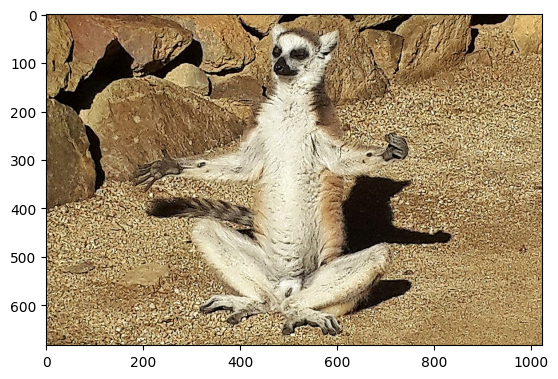

In [ ]:
sharpen_img = cv2.filter2D(image, ddepth=-1, kernel=sharpen_filter)

plt.imshow(sharpen_img)

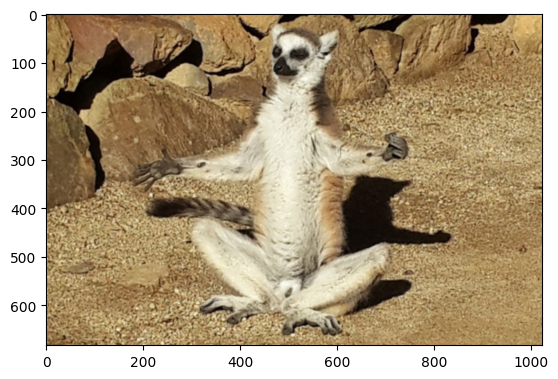

In [ ]:
box_blur_img = cv2.filter2D(image, ddepth=-1, kernel=box_blur_filter)

plt.imshow(box_blur_img)

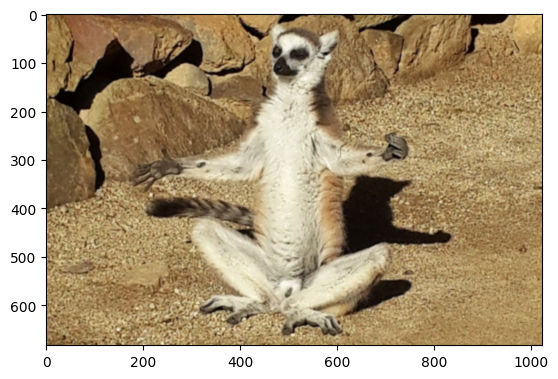

In [ ]:
gaussian_blur_img = cv2.filter2D(image, ddepth=-1, kernel=gaussian_blur_filter)

plt.imshow(gaussian_blur_img)

### Exercise 4 - Separable Kernels and Singular Value Decomposition:

Compute the separable kernels for

1. $M_1  = \left(\begin{array}{rrr}
		1 & 0 & -1 \\
		2 & 0 & -2 \\
		1 & 0 & -1
	\end{array}\right)$

2. $M_2$


using Singular Value Decomposition using ```np.linalg.svd()```. Notice, check the rank of the Matrices, if the rank is greater than 1, you will require more than one pair of separable filters (see Formula in slides) to write the original Matrix. Verify your results.

Hint:
The function ```np.expand_dims()``` could be useful to expand a vector to a $m\times 1$ matrix. Also use ```np.dot()``` do compute the matrix products.

In [ ]:
import numpy as np
M2 = np.array([[-1.47412723,  0.8894124 , -0.59958056, -0.85146208,  0.25647627],
                [-0.09911167, -1.1146661 ,  1.09199045,  0.1661623 ,  0.83799045],
                [-0.06645308,  0.94376287, -1.35037999, -0.17291736,  0.48961762],
                [-0.20277858,  0.79158964, -0.52730706, -0.14937656, -0.2604548 ],
                [ 0.88288206,  1.06550667, -0.23003262, -0.94998396, -0.69773753]])

In [ ]:
kernel1 = np.expand_dims(E[0] * U[:,0], axis=1)
kernel2 = np.expand_dims(Vt[0,:], axis=1)

print(kernel1)
print(kernel2)

print(np.dot(kernel1, kernel2.transpose()))

[[-1.41421356]
 [-2.82842712]
 [-1.41421356]]
[[-0.70710678]
 [ 0.        ]
 [ 0.70710678]]
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


Idea for Exercise - Image Compression via SVD


### Exercise 5 - Markers Detection:

In this exercise your goal is to develop a method that is capable of detecting the center position (in pixel coordinates as a tuple (x,y)) of square-shaped markers. I have provided you with three images (square-img1.png, square-img2.png and square-img3.png) to work with (you do not have to do any cross-validation).

**Note:** With only the algorithms we have learned so far, this might not be possible. Look out in books or online for other computer vision algorithms that can help with this type of problem (the Hough-Transform could by useful). Learning how to approach such problems with what we already know (the field is huge) is an essential skill in CV.

Then answer the following questions:
1. What were the main obstacles in finding your solution to the problem?
2. What were the main learning in finding your solution to the problem?
3. Explain how your algorithm works and what your rationale behind is.
4. Explain all algorithms (in a couple of sentences, do not write a book) you
have used that we have not covered in our lectures yet.


In [6]:
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/square-img1.png -o square-img1.png
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/square-img2.png -o square-img2.png
!python -m wget https://github.com/shegenbart/Jupyter-Exercises/raw/main/data/square-img3.png -o square-img3.png


Saved under square-img1.png

Saved under square-img2.png

Saved under square-img3.png


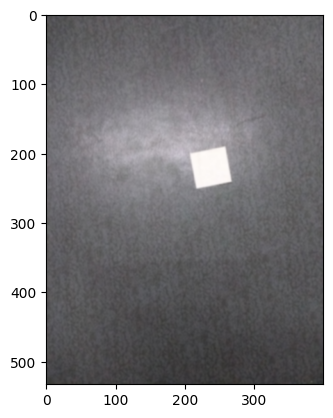

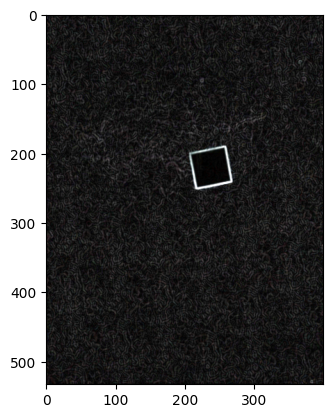

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("square-img1.png")

image = cv2.GaussianBlur(image, (5, 5), 0)

ver_image = cv2.filter2D(image, ddepth=-1, kernel=ver_sobel_filter)
ver_rev_image = cv2.filter2D(image, ddepth=-1, kernel=np.fliplr(ver_sobel_filter))
hor_image = cv2.filter2D(image, ddepth=-1, kernel=hor_sobel_filter)
hor_rev_image = cv2.filter2D(image, ddepth=-1, kernel=np.flipud(hor_sobel_filter))

intensity_img = cv2.add(ver_image, hor_image)
intensity_img = cv2.add(intensity_img, ver_rev_image)
intensity_img = cv2.add(intensity_img, hor_rev_image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
plt.imshow(intensity_img, cmap="gray")